In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import os

# Load AnnData

In [2]:
adata_path = os.path.expanduser("~/SSS_mount/insituCNV/InSituCNV/Load datasets/Lymph_Node/Xenium_HumanLymphNode_5K.h5ad")
adata = sc.read_h5ad(adata_path)

In [3]:
adata

AnnData object with n_obs × n_vars = 708983 × 4624
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_names', 'chromosome', 'start', 'end'
    uns: 'group_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

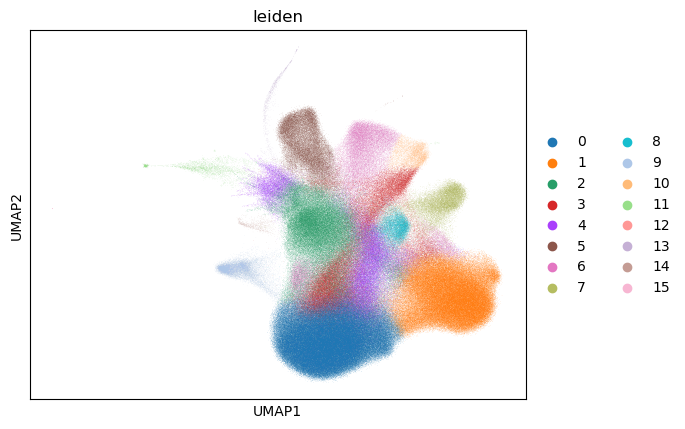

In [4]:
sc.pl.umap(adata, color = 'leiden')

## Save the raw gene count matrix to csv to use for SCEVAN analysis

In [5]:
raw_count_mtx = adata.layers["counts"].toarray()

In [6]:
adata.var

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,gene_names,chromosome,start,end
gene_names,,,,,,,,,,,,,
A2ML1,ENSG00000166535,Gene Expression,Unknown,734,0.001042,0.001042,99.896471,739.0,6.606650,A2ML1,chr12,8822621.0,8887001.0
AAMP,ENSG00000127837,Gene Expression,Unknown,57162,0.087365,0.083757,91.937465,61940.0,11.033937,AAMP,chr2,218264129.0,218270178.0
AAR2,ENSG00000131043,Gene Expression,Unknown,17950,0.026349,0.026008,97.468204,18681.0,9.835316,AAR2,chr20,36236131.0,36270918.0
AARSD1,ENSG00000266967,Gene Expression,Unknown,21433,0.031630,0.031140,96.976937,22425.0,10.017977,AARSD1,chr17,42950526.0,42964498.0
ABAT,ENSG00000183044,Gene Expression,Unknown,9165,0.013381,0.013292,98.707303,9487.0,9.157784,ABAT,chr16,8674596.0,8784575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN26,ENSG00000197062,Gene Expression,Unknown,25728,0.038160,0.037450,96.371140,27055.0,10.205664,ZSCAN26,chr6,28267058.0,28278224.0
ZSWIM6,ENSG00000130449,Gene Expression,Unknown,10264,0.014811,0.014703,98.552293,10501.0,9.259321,ZSWIM6,chr5,61332258.0,61546172.0
ZUP1,ENSG00000153975,Gene Expression,Unknown,18951,0.027869,0.027488,97.327016,19759.0,9.891415,ZUP1,chr6,116635618.0,116668794.0


In [ ]:
adata

# Illustrate the genome coverage of the data (then make this into a module)

In [ ]:
# Make function to illustrate the genome coverage of an anndata object were the genes are annotatied with chromosome, start, end

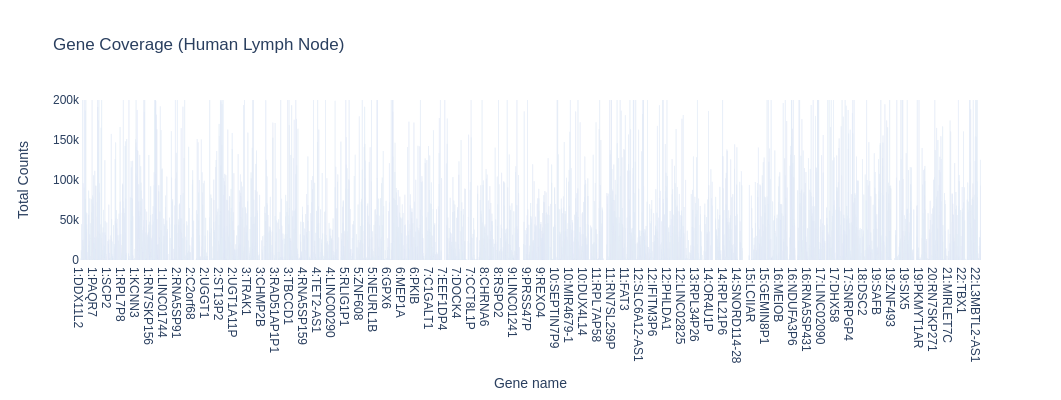

In [37]:
genes_path = os.path.expanduser("~/SSS_mount/insituCNV/InSituCNV/Ensmbl_BioMart_gene_info.txt")
gene_data = pd.read_csv(genes_path, sep=',', header=0, names=['Gene ID', 'Chromosome', 'Start', 'End', 'Gene name'])

gene_data_sorted = gene_data.sort_values(by=['Chromosome', 'Start'])

# Initialize an empty matrix with zeros
matrix = pd.DataFrame(0, index=gene_data_sorted['Gene ID'], columns=['Human Lymph Node'])

# Assuming you have already loaded or created the adata object and it has attributes var.total_counts and var.gene_ids

# Convert the adata.var to a DataFrame for easier manipulation
var_data = pd.DataFrame({
    'Gene ID': adata.var['gene_ids'],
    'Total Counts': adata.var['total_counts']
})

# Merge the gene_data_sorted with var_data to add the total counts
merged_data = gene_data_sorted.merge(var_data, on='Gene ID', how='left')

merged_data.index = merged_data['Gene ID']

# Fill the matrix with the total counts for the corresponding gene IDs
matrix.loc[merged_data['Gene ID'], 'Human Lymph Node'] = merged_data['Total Counts']

# Plot the gene coverage
import plotly.express as px
import plotly.io as pio

gene_data_sorted['chrom_gene'] = gene_data_sorted['Chromosome'].astype(str) + ':' + gene_data_sorted['Gene name']

# Create a Plotly bar plot
fig = px.bar(
    matrix_sorted, 
    x=gene_data_sorted.chrom_gene, 
    y='Human Lymph Node', 
    title='Gene Coverage (Human Lymph Node)',
    labels={'x': 'Gene name', 'Human Lymph Node': 'Total Counts'},
    color_discrete_sequence=['blue']
    # color = 'b'
)

# Update layout for better visualization
fig.update_layout(
    # xaxis={'visible': False},  # Hide x-axis labels
    yaxis_range=[0, 200000],  # Set y-axis limit
    width=1200,  # Set plot width
    height=400,  # Set plot height
    plot_bgcolor='white', 
    paper_bgcolor='white'

)

# Save as HTML
# pio.write_html(fig, file='gene_coverage_plot.html', auto_open=True)

# Generate a matrix for the CNVs to add (cell population, genomic region)

Divide the dataset into four groups  

1.   Normal (unaltered)
2.   Subclone A (fewer CNVs)
3.   Subclone B (same as A but added)
4.   Subclone C (same as A but added)


Choose chromosomal regions to be duplicated or deleted

If we generate several CNVs throughout the genome, it might be possible to compare the detection efficiency as to how many of the CNVs are detected. Or else, it's just - works/not works.



Things to consider: 
- how the size (nbr of cells) of the subclone affect the outcome - or make same size populations and avoid adressing this
- choose the size of the CNVs
    - literature to find an appropriate size for CNVs (50bp - several Mbs https://doi.org/10.1016%2Fj.bj.2021.02.003)
    - different sizes to see how that affects the outcome - or make every CNV the same size


## Modules to simulate CNVs in adata

### Module: Generate CNVs

This function generates copy number variations (CNVs) based on a dictionary (**CNV_dict**) of genes (keys) and whether they should be gain or loss (value). The size (bp) of the CNV is a randomly chosen size between **min_size** and **max_size**. The gene will be in the center of the CNV, so half of the size (bp) is subtracted (start) and added (end) from the center of the gene position ('Gene end (bp)'- 'Gene start (bp)')/2), taken from the **gene_list**. The output will be a list of these CNVs, specifying the gene name, chromosome, size (bp), type (gain/loss), start (bp), end (bp).

input:

- **CNV_dict** - dict. Gene name (key) and whether they should be 'gain' or 'loss'. Could for example be gain of known oncogenes or loss of tumor supressors. Gene selection inspo: https://doi.org/10.1080%2F07853890.2023.2280708
- **min_size** - nbr in bp.
- **max_size** - nbr in bp. A size of the CNV is generated as a random number between the min and max
- **gene_info** - the *Ensmbl_BioMart_gene_info.txt* containing 'Gene stable ID', 'Chromosome/scaffold name', 'Gene start (bp)', 'Gene end (bp)', 'Gene name'

output:

- **CNV_df** (DataFrame): Compiling the gene name, chromosome, size, type, start, end


### Module: Create CNV template

This function generates a CNV template for an AnnData object based on a predifined number of subclones, and their CNVs, generated by the generate_cnvs function.  

input:

- **adata** - the AnnData object
- **CNV_df** (DataFrame): from the *'Generate CNVs'* module. the gene name, chromosome, size, type, start, end - . The type should generate either -1/+1 depending on if it's 'gain' or 'loss'.

output:

- **cnv_template_df** (DataFrame). For each CNV (gene name) - generate an array with -1/0/1 values for each gene in the adata.var_names


### Module: Simualte CNVs in the data

This function applies poission distribution / binomial probability to simulate one arm gains and losses (increase/keep/decrease the counts (adata.X) depending on the -1/0/1 value of the cnv_template_df: if -1, the probability is 0.5 and if 1 it is 1.5). This is done according to a subclone_dict, where each key is a subclone, and the values state which CNVs to add to these cells.  

input:

- **adata** - the AnnData object to add the CNVs on
- **cnv_template_df** matrix. from the *'Create CNV template'* module
- **subclone_dict** (dictionary) For each subclone (key), a list of which CNVs to assign (values). randomly assigning each cell to one of these subclones (adata.obs.simulated_subclone)

output:

- **adata** - the AnnData object with simulated CNVs as a layer to the adata.X, (as well as the CNV template as a 'CNV_template' layer?)

## generate_cnvs

In [55]:
CNV_dict = { 
    'DIS3': 'loss',
    'EPHB1': 'loss',
    'ERBB2': 'gain',
    'FLT1': 'gain',
    'HCK': 'gain',
    'KEAP1': 'loss',
    'MYD88': 'gain',
    'TBX3': 'gain'
}

min_size = 100
max_size = 1000000


gene_file = os.path.expanduser("~/SSS_mount/insituCNV/InSituCNV/Ensmbl_BioMart_gene_info.txt")
gene_info = pd.read_csv(gene_file)

In [67]:
import random
import pandas as pd

def generate_cnvs(CNV_dict, min_size, max_size, gene_info, save = None):

    
    cnv_list = []

    for gene in CNV_dict:
        # Check if the gene is present in gene_info DataFrame
        if gene not in gene_info['Gene name'].values:
            print(f"Gene '{gene}' not found in gene_info DataFrame.")
            continue
        
        # Find gene details in the gene_info DataFrame
        gene_row = gene_info.loc[gene_info['Gene name'] == gene].iloc[0]
        
        # Calculate gene center
        gene_center = (gene_row['Gene end (bp)'] + gene_row['Gene start (bp)']) // 2
        
        # Randomly generate CNV size
        cnv_size = random.randint(min_size, max_size)
        
        # Calculate CNV start and end positions
        cnv_start = gene_center - cnv_size // 2
        cnv_end = gene_center + cnv_size // 2
        
        # Create CNV entry
        cnv = {
            'Gene name': gene,
            'Chromosome': gene_row['Chromosome/scaffold name'],
            'Size (bp)': cnv_size,
            'Type': CNV_dict[gene],
            'Start (bp)': cnv_start,
            'End (bp)': cnv_end
        }
        
        cnv_list.append(cnv)
    
    # Convert the list of CNV dictionaries to a DataFrame
    cnv_df = pd.DataFrame(cnv_list)

    if save:
        cnv_df.to_csv(save, index=None)
    
    return cnv_df

In [68]:
gene_info

,Gene stable ID,Chromosome/scaffold name,Gene start (bp),Gene end (bp),Gene name
0,ENSG00000228037,1,2581560,2584533,NaN
1,ENSG00000142611,1,3069168,3438621,PRDM16
2,ENSG00000284616,1,5301928,5307394,NaN
3,ENSG00000157911,1,2403964,2413797,PEX10
4,ENSG00000260972,1,5492978,5494674,NaN
...,...,...,...,...,...
59945,ENSG00000286823,9,72060576,72081448,NaN
59946,ENSG00000224820,9,72107818,72108312,BTF3P4
59947,ENSG00000225194,9,96019724,96027993,LINC00092
59948,ENSG00000275465,9,96068566,96116411,NaN


In [71]:
CNV_df = generate_cnvs(CNV_dict, min_size, max_size, gene_info, save = 'test.csv')

## create_cnv_template

In [72]:
CNV_df

,Gene name,Chromosome,Size (bp),Type,Start (bp),End (bp)
0,DIS3,13,680540,loss,72426862,73107402
1,EPHB1,3,795215,loss,134630256,135425470
2,ERBB2,17,549548,gain,39434396,39983944
3,FLT1,13,915606,gain,27939942,28855548
4,HCK,20,388289,gain,31882882,32271170
5,KEAP1,19,375943,loss,10306870,10682812
6,MYD88,3,915967,gain,37682805,38598771
7,TBX3,12,334089,gain,114510171,114844259


In [109]:
import pandas as pd
import numpy as np

def create_cnv_template(adata, CNV_df):
    # Step 1: Order adata.var by chromosome and start position
    adata.var = adata.var.sort_values(by=['chromosome', 'start'])
    
    # Initialize the CNV template matrix with zeros
    cnv_template = np.zeros((len(CNV_df), len(adata.var_names)))

    # Create a mapping of gene names to indices in the sorted AnnData object
    gene_to_index = {gene: idx for idx, gene in enumerate(adata.var_names)}

    # Step 2: Loop through each CNV in the CNV_df
    for i, row in CNV_df.iterrows():
        chromosome = row['Chromosome']
        cnv_start = row['Start (bp)']
        cnv_end = row['End (bp)']
        cnv_type = row['Type']
        
        # Find the genes in the corresponding chromosome that fall within the CNV region
        selected_genes = adata.var[
            (adata.var['chromosome'] == chromosome) &
            (adata.var['start'] >= cnv_start) &
            (adata.var['start'] <= cnv_end)
        ]
        
        # Determine the CNV effect: -1 for loss, +1 for gain
        cnv_effect = -1 if cnv_type == 'loss' else 1
        
        # Step 3: Set the corresponding entries in the CNV template matrix
        for gene in selected_genes.index:
            gene_index = gene_to_index[gene]
            cnv_template[i, gene_index] = cnv_effect
    
    # Convert the CNV template matrix to a DataFrame for easier interpretation
    cnv_template_df = pd.DataFrame(cnv_template, columns=adata.var_names)
    
    # Optionally, add the name of the CNV (gene name) as rownames in the DataFrame for reference
    cnv_template_df.index = CNV_df['Gene name'].values

    return cnv_template_df


In [101]:
cnv_template_df = create_cnv_template(adata, CNV_df)
cnv_template_df

gene_names,HES4,TNFRSF18,PUSL1,DVL1,ATAD3A,PRKCZ,TNFRSF14,MMEL1,WRAP73,TP73,...,VEGFD,VSIG4,WAS,XIAP,ZBTB33,ZC4H2,ZFX,ZMYM3,ZNF280C,ZNF449
DIS3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EPHB1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ERBB2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FLT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HCK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KEAP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MYD88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TBX3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## simulate_cnvs

In [103]:
subclone_dict = {
    'N': [], # Normal cells without CNV simulations
    'A': ['DIS3', 'EPHB1', 'ERBB2', 'FLT1'], # Original genetic subclone
    'B': ['DIS3', 'EPHB1', 'ERBB2', 'FLT1', 'HCK', 'KEAP1'], 
    'C': ['DIS3', 'EPHB1', 'ERBB2', 'FLT1', 'MYD88', 'TBX3'],
}

In [141]:
import numpy as np
import pandas as pd
import anndata

def simulate_cnvs(adata, cnv_template_df, subclone_dict):
    # Step 1: Create a new layer in adata to store the simulated CNV data
    adata.layers['CNV_simulated'] = adata.X.copy()

    # Step 2: Randomly assign cells to subclones based on subclone_dict
    num_cells = adata.shape[0]
    subclone_names = list(subclone_dict.keys())
    adata.obs['simulated_subclone'] = np.random.choice(subclone_names, size=num_cells, replace=True)

    # Step 3: Apply CNVs to the expression data based on the assigned subclone
    for subclone, cnvs in subclone_dict.items():
        if not cnvs:
            # Skip if the CNV list is empty
            continue
        
        # Get cells assigned to the current subclone
        subclone_cells = adata.obs['simulated_subclone'] == subclone
        
        for cnv in cnvs:
            # Extract the CNV effect for this gene from cnv_template_df
            cnv_row = cnv_template_df[cnv_template_df.index == cnv]
            cnv_effects = cnv_row.values.flatten()
            
            for gene_idx, effect in enumerate(cnv_effects):
                if effect == -1:
                    # Simulate loss of copy (binomial with p = 0.5)
                    adata.layers['CNV_simulated'][subclone_cells, gene_idx] = np.random.binomial(
                        adata.layers['CNV_simulated'][subclone_cells, gene_idx].astype(int), 0.5
                    )
                elif effect == 1:
                    # Simulate gain of copy (poisson with lambda = 1.5)
                    adata.layers['CNV_simulated'][subclone_cells, gene_idx] = np.random.poisson(
                        1.5 * adata.layers['CNV_simulated'][subclone_cells, gene_idx]
                    )

    return adata

In [147]:
adata.layers['CNV_simulated']

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 157025660 stored elements and shape (708983, 4624)>